# FINANCIAL ANALYSIS

based on the following data:

- JOURNAL ENTRIES (5 YEARS)
- FINANCIAL STATEMENTS (5 YEARS)
- FINANCIAL STATEMENTS OF THE 5 MOST SIGNIFICANT COMPETITORS (1 YEAR)

### Import dependancies

In [1]:
from glob import glob
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# from matplotlib.widgets import Cursor
import numpy as np
import seaborn as sns

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from components import ComponentsLedger
from utilities import Utilities

In [2]:
# helper variables
years = [2019, 2020, 2021, 2022, 2023]

### Load data

In [3]:
ledger_files = sorted(glob("../data/parquet/financial_journal_*.parquet"))

df = pd.concat((pd.read_parquet(file) for file in ledger_files))
ledger_files

['../data/parquet\\financial_journal_2019.parquet',
 '../data/parquet\\financial_journal_2020.parquet',
 '../data/parquet\\financial_journal_2021.parquet',
 '../data/parquet\\financial_journal_2022.parquet',
 '../data/parquet\\financial_journal_2023.parquet']

## 1. Data Filtering

The exported data has already been processed (since it reflects the company’s financial changes throughout the year), except for the opening and closing balances, i.e., the carryover of the opening balance (duplicate values from the previous year) and the final entries (duplicate values for the current year to balance the debit and credit sides).

The financial statements and competitor reports were exported from the website of the Agency for Business Registers, so no further cleaning is required.

Napomena: S obzirom na to da identifikator završnih knjiženja nije poznat, nisu sva završna knjiženja uklonjena, međutim završna knjiženja grupa 5 i 6 se nalaze na obrnutoj strani što neće imati uticaja na dalju analizu.

In [7]:
df['date'] = pd.to_datetime(df['date'])

df = df[~((df['date'].dt.month == 1) & (df['date'].dt.day == 1))]
df = df[~(df['account'].str.startswith(('599', '699', '7')))]

df.head()

,date,account,debit,credit
4434,2019-01-02,34100,95074521.37,0.00
4435,2019-01-02,34001,0.00,95074521.37
4436,2019-01-02,023102,662752.75,0.00
4437,2019-01-02,029302,0.00,44183.52
4438,2019-01-02,22820,-295000.00,0.00


## 2. Data analysis & Visual Presentation

### 2.1. Capital Expenditures

#### Comparison of Capital Expenditure and Revenue Growth
It shows how investment in fixed assets contributes to revenue growth, without necessarily emphasizing causality, as revenues are also influenced by other factors.

In [5]:
# extract capital expenditures data [buildings]

df_buildings = (
    df[df['account'].str.startswith('022')]
    .drop(columns=['credit'], errors='ignore')
    .query("debit > 0")
    .assign(year=lambda x: pd.to_datetime(x['date']).dt.year)
    .groupby('year', as_index=False)['debit'].sum()
)

df_equipment = (
    df[df['account'].str.startswith('023')]
    .drop(columns=['credit'], errors='ignore')
    .query("debit > 0")
    .assign(year=lambda x: pd.to_datetime(x['date']).dt.year)
    .groupby('year', as_index=False)['debit'].sum()
)

df_revenue = (
    df[(df['account'].str.startswith('60')) | (df['account'].str.startswith('61'))]
    .query("credit > 0")
    .assign(year=lambda x: pd.to_datetime(x['date']).dt.year)
    .groupby('year', as_index=False)['credit'].sum()
)

xxx = ComponentsLedger.calculate_increasing_column_value(df_buildings, 'debit')
# df_equipment = ComponentsLedger.get_account_data(df, '023')
# df_revenue = ComponentsLedger.get_account_data(df['60', '61'])

xxx
# df_buildings
# df_2_1_cap_exp_buildings['month_year'] = df_2_1_cap_exp_buildings['date'].dt.to_period('M')

# # Group by month-year and sum the debit column
# monthly_sums = df_2_1_cap_exp_buildings.groupby('month_year')['debit'].sum()

# # Convert to a dictionary with 'month-year' as keys
# monthly_sums_dict = {str(period): value for period, value in monthly_sums.items()}

# df_2_1_cap_exp_buildings

,year,debit
0,2019,383534.0
1,2020,383535.0
2,2021,1210649.0
3,2022,14722612.5
4,2023,14722613.5


In [6]:
df_buildings = components_class_obj.account_df(['022'])
df_equipment = components_class_obj.account_df(['023'])
df_revenue = components_class_obj.account_df(['60', '61'])

buildings_sum_per_year = df_buildings.groupby(df_buildings['date'].dt.year)['debit'].sum()
equipment_sum_per_year = df_equipment.groupby(df_equipment['date'].dt.year)['debit'].sum()
revenue_sum_per_year = df_equipment.groupby(df_equipment['date'].dt.year)['debit'].sum()


# uradilti graf i neki indikator povezanosti ili nepovezanosti

NameError: name 'components_class_obj' is not defined

### VISUALIZATION

In [ ]:
##2 lines

### CORRELATION: 

In [ ]:
###scatter

## 2. Inventory

Data extraction: Inventory value for each month

In [ ]:
# pocetno stanje zaliha
pocetno_stanje_zaliha = df_yr1
starting_date = pocetno_stanje_zaliha['date'].min()
filtered_df = pocetno_stanje_zaliha[(pocetno_stanje_zaliha['account'].str.startswith('13')) & (pocetno_stanje_zaliha['date'] == starting_date)]
debit_sum = filtered_df['debit'].sum()
credit_sum = filtered_df['credit'].sum()
inventory_starting_balance = debit_sum - credit_sum

inventory_starting_balance

roba = components_class_obj.account_df(['13'])

# Group by year and month, then sum the debit and credit columns
monthly_summary = roba.groupby(roba['date'].dt.to_period('M')).agg(
    Total_Debit=('debit', 'sum'),
    Total_Credit=('credit', 'sum')
).reset_index()

# Inventory value total
monthly_summary['Inventory_Value'] = inventory_starting_balance + monthly_summary['Total_Debit'].cumsum() - monthly_summary['Total_Credit'].cumsum()

# Column selection
monthly_summary = monthly_summary[['date', 'Inventory_Value']]

inventory_series = monthly_summary['Inventory_Value']

### Customers' Invoice Monthly Value for Inventory Analysis.

Comparing the inventory value in the warehouse (purchase vs. sale value), with added initial stock, and the monthly customer value, the goal was to roughly determine whether the inventory is overstocked or optimized to meet typical demand. Although the inventory output value without margins and dependent costs is already reflected in the customer value, it provides a general indication of whether stock levels are well-managed or excessive.

In [ ]:
df_buyers = components_class_obj.account_df(['60'])
df_buyers = df_buyers.drop(columns=['credit'])
# checking accounts in df_buyers
# account_list = df_buyers['account'].apply(lambda x: x.split('-')[0]).drop_duplicates().tolist()

buyers_monthly = df_buyers.groupby(df_buyers['date'].dt.to_period('M')).agg(
    Total_Debit=('debit', 'sum')
).reset_index()

customer_series = buyers_monthly['Total_Debit']

### VISUALIZATION: Current Monthly Warehouse Inventory Value & Customer Monthly Demand

Provides a visual representation of potential warehouse overstock by comparing the current inventory value with customer demand.

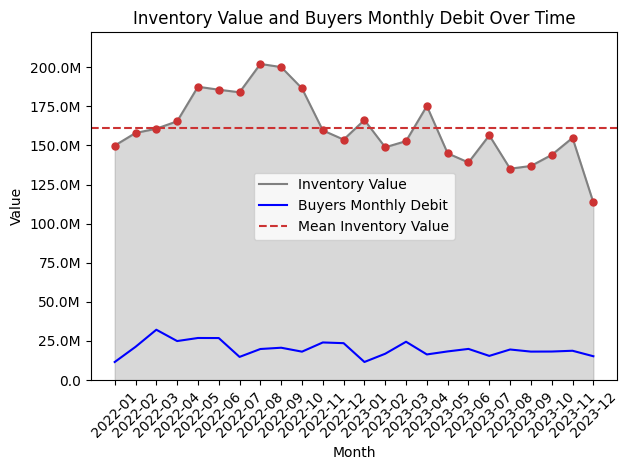

In [ ]:
# Group by year and month for buyers_monthly
buyers_monthly = df_buyers.groupby(df_buyers['date'].dt.to_period('M')).agg(
    Total_Debit=('debit', 'sum')
).reset_index()

fig, ax = plt.subplots()

# Line chart sa shaded delom ispod linije za inventory
ax.plot(monthly_summary['date'].astype(str), monthly_summary['Inventory_Value'], label='Inventory Value', color=(0.5, 0.5, 0.5))
ax.fill_between(monthly_summary['date'].astype(str), monthly_summary['Inventory_Value'], color=(0.5, 0.5, 0.5), alpha=0.3)

# Obeležavanje tačaka za svaki mesec
points = ax.scatter(monthly_summary['date'].astype(str), monthly_summary['Inventory_Value'], color=(0.8, 0.2, 0.2), s=25, zorder=5)

# Linijski graf za buyers_monthly (plava boja)
ax.plot(buyers_monthly['date'].astype(str), buyers_monthly['Total_Debit'], label='Buyers Monthly Debit', color='blue')

# Oznake na X osi (meseci)
ax.set_xticks(range(len(monthly_summary['date'])))
ax.set_xticklabels(monthly_summary['date'].astype(str), rotation=45, ha='center')

# Oznake na Y osi u hiljadama ili milionima
def thousands_or_millions(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.1f}K'
    else:
        return str(x)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(thousands_or_millions))

# Definiši srednju vrednost
mean_value = monthly_summary['Inventory_Value'].mean()

# Postavi y granice
ax.set_ylim(0, max(monthly_summary['Inventory_Value'].max(), buyers_monthly['Total_Debit'].max()) * 1.1)  # Dodaj malo prostora iznad maksimalne vrednosti

# Dodaj horizontalnu liniju na srednjoj vrednosti za zalihe
ax.axhline(y=mean_value, color=(0.8, 0.2, 0.2), linestyle='--', label='Mean Inventory Value')

# Dodavanje naslova i labela
ax.set_title('Inventory Value and Buyers Monthly Debit Over Time')
ax.set_xlabel('Month')
ax.set_ylabel('Value')

# Dodajemo interaktivni prikaz vrednosti pri kliku
annot = ax.annotate("", xy=(0,0), xytext=(20,20),
                    textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    pos = points.get_offsets()[ind["ind"][0]]
    annot.xy = pos  # Set annotation position
    # Set the annotation text
    text = f"Month: {monthly_summary['date'].iloc[ind['ind'][0]]}\nValue: {pos[1]:.2f}"
    annot.set_text(text)
    # Optional: You can change the annotation's background color here if needed
    annot.get_bbox_patch().set_facecolor('white')

def onclick(event):
    if event.inaxes == ax:
        # Check if a point is clicked
        cont, ind = points.contains(event)
        if cont:
            # If a point is clicked, update the annotation
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()  # Redraw the canvas to show the annotation
        else:
            # If no point is clicked, hide the annotation
            annot.set_visible(False)
            fig.canvas.draw_idle()

# Povezivanje sa click eventom
fig.canvas.mpl_connect("button_press_event", onclick)

# Dodavanje kursora za preciznost pri kliku
cursor = Cursor(ax, useblit=True, color='red', linewidth=1)

plt.legend()  # Prikazujemo legendu
plt.tight_layout()
plt.show()


### CORRELATION: Inventory Stock & Customer Demand

Comparison between two NumPy series: customer demand and net inventory stock to determine if there is a connection between proper inventory management and demand for inventory stocks.

In [ ]:
correlation_matrix = np.corrcoef(inventory_series, customer_series)

# Extract the correlation coefficient (the value at position [0, 1] or [1, 0] in the matrix)
correlation_coefficient = correlation_matrix[0, 1]

print("Correlation coefficient:", correlation_coefficient)

Correlation coefficient: 0.22328876671899328


In [ ]:
### scatter